# 

# Exercícios de matrizes

Atenção: Para quem tiver o Copilot ativo, o desligue antes de realizar o exercício.

In [1]:
import numpy as np

## Exercício

Construa:

1. Uma matriz 2x3 da seguinte forma
$$A = \begin{bmatrix}
0 & 1 & 0\\ 
0 & 0 & 1\\
0 & 0 & 0
\end{bmatrix}$$
2. Uma matriz linha
$$\mathbf{x} = \begin{bmatrix}
1 & 0 & 0
\end{bmatrix}$$

In [2]:
A = np.array([[0,1,0],[0,0,1],[0,0,0]])

x = np.array([1,0,0])

A, x

(array([[0, 1, 0],
        [0, 0, 1],
        [0, 0, 0]]),
 array([1, 0, 0]))

Agora realize as seguintes operações:

- $\mathbf{x} A$
- $\mathbf{x} A^2$
- $\mathbf{x} A^3$
- $A^3$

Para o último cálculo, pode-se utilizar a função `np.linalg.matrix_power()`

In [3]:
(
    x@A,
    x@(A@A),
    x@(A@A@A),
    (A@A@A)
)

(array([0, 1, 0]),
 array([0, 0, 1]),
 array([0, 0, 0]),
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [4]:
np.linalg.matrix_power(A,3)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

Opcional: Tente interpretar a operação realizada via grafos para compreender o que está ocorrendo

Matriz de adjacência:
 [[0 1 0]
 [0 0 1]
 [0 0 0]]


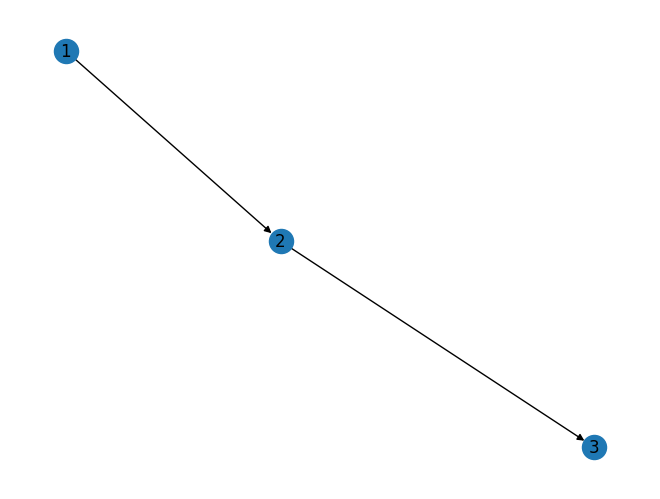

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

mapping = {0: 1, 1: 2, 2: 3}

grafo = nx.from_numpy_array(A, create_using=nx.DiGraph)
grafo = nx.relabel_nodes(grafo, mapping)
nx.draw(grafo, with_labels=mapping)
print("Matriz de adjacência:\n",A)
plt.show()



A matriz de adjacência nos mostra quantos caminhos de comprimento 1 existem entre os nós do grafo, no caso temos 2.

Matriz de adjacência ao quadrado:
 [[0 0 1]
 [0 0 0]
 [0 0 0]]


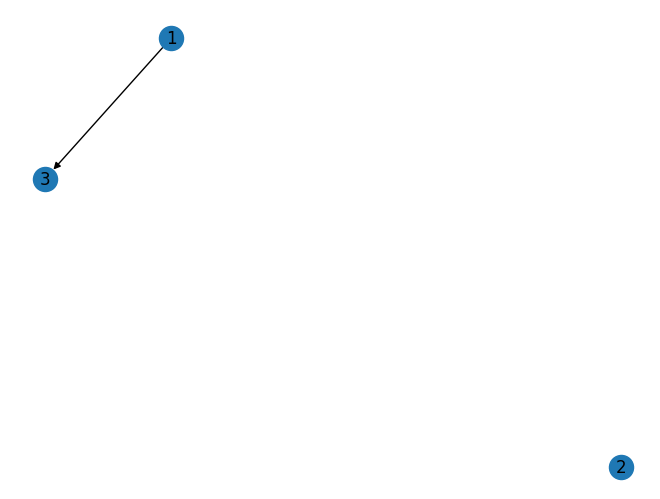

In [7]:
grafo = nx.from_numpy_array(np.linalg.matrix_power(A,2), create_using=nx.DiGraph)
grafo = nx.relabel_nodes(grafo, mapping)
nx.draw(grafo, with_labels=mapping)
print("Matriz de adjacência ao quadrado:\n",np.linalg.matrix_power(A,2))
plt.show()


A matriz de adjacência ao quadrado nos mostra quantos caminhos de comprimento 2 existem entre os nós do grafo, no caso temos 1, conforme esperado (1 pra 2 + 2 pra 3 = 1 pra 3)

Matriz de adjacência ao cubo:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]


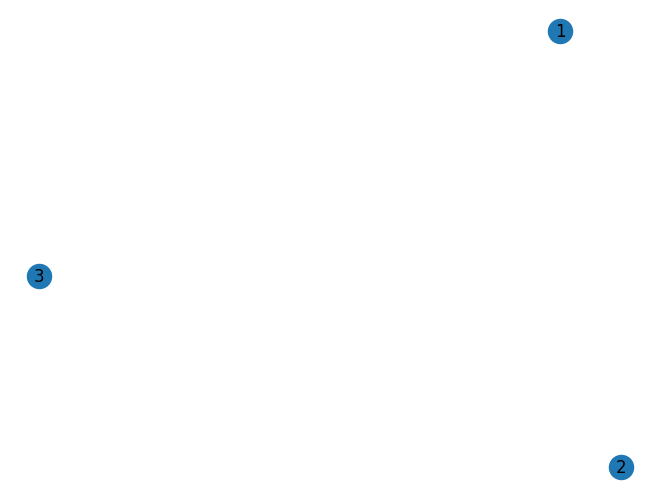

In [8]:
grafo = nx.from_numpy_array(np.linalg.matrix_power(A,3), create_using=nx.DiGraph)
grafo = nx.relabel_nodes(grafo, mapping)
nx.draw(grafo, with_labels=mapping)
print("Matriz de adjacência ao cubo:\n",np.linalg.matrix_power(A,3))
plt.show()

A matriz de adjacência ao cubo nos mostra quantos caminhos de comprimento 3 existem entre os nós do grafo, no caso não temos caminhos de comprimento 3.

## Exercício

Considere
$$A = \begin{bmatrix}
0 & 1 & 0\\ 
0 & 0 & 1\\
0 & 0 & 0
\end{bmatrix}$$

A matriz $A$ possui inversa?

In [11]:
try:
    np.linalg.inv(A)
except Exception as e:
    print("Erro: ",e)

Erro:  Singular matrix


Não possui inversa, pois é uma matriz singular.

Agora, construa uma matriz $L$ para realizar $L A$ de tal forma que:

1. Mude a linha 1 para a linha 2
2. Mude a linha 2 para a linha 3
3. Faça a linha 1 ser a combinação linear das linhas 1 e 2

In [28]:
L = np.array([(A[0]+A[1]),A[0],A[1]])
print("Matriz L:\n",L,"\n")

LA = L @ A
print("Matriz LA:\n",LA)

Matriz L:
 [[0 1 1]
 [0 1 0]
 [0 0 1]] 

Matriz LA:
 [[0 0 1]
 [0 0 1]
 [0 0 0]]


Responda, a matriz $L A$ possui inversa?

In [29]:
try:
    np.linalg.inv(LA)
except Exception as e:
    print("Erro: ",e)

Erro:  Singular matrix


Não possui inversa, pois é uma matriz singular.

Agora construa uma matriz $R$ para realizar $L A R$ de forma que:

1. A primeira coluna seja igual a do meio
2. A segunda coluna seja igual a terceira
3. A terceira coluna seja a a última menos a segunda


### __ATENÇÃO__

__Não ficou muito claro qual matriz eu deveria usar como referência, então estou fazendo baseado na matriz A__



In [35]:
print("Matriz A:\n",A)

Matriz A:
 [[0 1 0]
 [0 0 1]
 [0 0 0]]


In [36]:
R = np.array([[1,0,-1],[0,1,1],[0,0,0]])

print("Matriz R:\n",R)

Matriz R:
 [[ 1  0 -1]
 [ 0  1  1]
 [ 0  0  0]]


In [41]:
LAR = L@A@R
print("Matriz LAR:\n",LAR)

Matriz LAR:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]


Responda, a matriz $L A R$ possui inversa?

In [44]:
try:
    np.linalg.inv(LAR)
except Exception as e:
    print("Erro: ",e)

Erro:  Singular matrix


Não possui inversa, pois é uma matriz singular.

__Em todos os casos as operações foram combinações entre colunas/linhas da Matriz original, portanto o resultado ainda será de matrizes singulares__

## Exercício

Dada a matriz ortogonal (e também diagonal) abaixo

$$A = \begin{bmatrix}
3 & 0 & 0\\ 
0 & 4 & 0\\
0 & 0 & 2
\end{bmatrix}$$

Tente encontrar (diretamente) uma matriz $M$, tal que $M A = I$

$$\begin{bmatrix}
? & ? & ?\\ 
? & ? & ?\\
? & ? & ?
\end{bmatrix} \begin{bmatrix}
3 & 0 & 0\\ 
0 & 4 & 0\\
0 & 0 & 2
\end{bmatrix} = \begin{bmatrix}
1 & 0 & 0\\ 
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}$$

In [47]:
A = np.array([[3, 0, 0],
              [0, 4, 0],
              [0, 0, 2]])
print("Matriz A:\n",A)

Matriz A:
 [[3 0 0]
 [0 4 0]
 [0 0 2]]


Uma matriz vezes a sua inversa nos dará a matriz identidade, logo M deverá ser a inversa de A

In [49]:
M = np.array(np.linalg.inv(A))
print("Matriz M:\n",M,"\n")
MA = M @ A
print("Matriz MA:\n",MA)

Matriz M:
 [[0.33333333 0.         0.        ]
 [0.         0.25       0.        ]
 [0.         0.         0.5       ]] 

Matriz MA:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Agora faça $A M$

In [50]:
A @ M

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Nesse caso a ordem não afeta o resultado pois A é uma matriz diagonal.

## Exercício

Dado a matriz ortogonal abaixo

In [51]:
A = np.array([[.5**.5, -.5**.5, 0],
              [.5**.5, .5**.5, 0],
              [0, 0, 1]])
A

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

O produto interno da primeira coluna com a segunda coluna é 0

In [52]:
A[:,0] @ A[:,1]

0.0

Verifique agora o produto interno entre todas as colunas

In [65]:
c_a_1 = A[:,0]
c_a_2 = A[:,1]
c_a_3 = A[:,2]
print("Produto Interno Ac1 com Ac2: ",c_a_1@c_a_2,"\n")
print("Produto Interno Ac1 com Ac3: ",c_a_1@c_a_3,"\n")
print("Produto Interno Ac2 com Ac3: ",c_a_2@c_a_3,"\n")

Produto Interno Ac1 com Ac2:  0.0 

Produto Interno Ac1 com Ac3:  0.0 

Produto Interno Ac2 com Ac3:  0.0 



Agora verifique o produto interno das colunas consigo mesmo, i.e., primeira com a primeira, ...

Observação: a seguir, despreze os pequenos erros de representação.

In [64]:
print("Produto Interno Ac1 com Ac1: ",c_a_1@c_a_1,"\n")
print("Produto Interno Ac2 com Ac2: ",c_a_2@c_a_2,"\n")
print("Produto Interno Ac2 com Ac3: ",c_a_3@c_a_3,"\n")

Produto Interno Ac1 com Ac1:  1.0000000000000002 

Produto Interno Ac2 com Ac2:  1.0000000000000002 

Produto Interno Ac2 com Ac3:  1.0 



Agora, crie uma matriz $B$ onde as linhas de $A$ são as colunas de $B$

In [63]:
B = np.transpose(A)
B

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

Agora faça os produtos internos:

- primeira coluna de $A$ com a primeira linha de $B$
- segunda coluna de $A$ com a segunda linha de $B$
- terceira coluna de $A$ com a terceira linha de $B$

In [69]:
l_b_1 = B[0,:]
l_b_2 = B[1,:]
l_b_3 = B[2,:]
print("Produto Interno Ac1 com Bl1: ",c_a_1@l_b_1,"\n")
print("Produto Interno Ac2 com Bl2: ",c_a_2@l_b_2,"\n")
print("Produto Interno Ac3 com Bl3: ",c_a_3@l_b_3,"\n")


Produto Interno Ac1 com Bl1:  1.0000000000000002 

Produto Interno Ac2 com Bl2:  1.0000000000000002 

Produto Interno Ac3 com Bl3:  1.0 



Não muda o resultado, fica igual o resultado anterior, já que a linha de B é igual a coluna de A

In [72]:
print("Primeira coluna de A: ",c_a_1,"\n")
print("Primeira linha de B: ",l_b_1,"\n")

Primeira coluna de A:  [0.70710678 0.70710678 0.        ] 

Primeira linha de B:  [0.70710678 0.70710678 0.        ] 



Agora interprete o resultado da multiplicação $B A$ como produto internos das linhas de $B$ com colunas de $A$

In [71]:
np.around(B @ A, decimals=3)

array([[ 1., -0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Foi dado que A é uma matriz ortogonal, logo sua inversa é igual à sua matriz transposta.

Portanto, a multiplicação de B por A resulta em uma matriz diagonal com elementos iguais a 1.0, nesse caso sendo igual ao produto interno.